In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
diab = pd.read_csv("C:/Users/harik/python pratice/00 - datasets-20251216T065029Z-1-001/00 - datasets/Diab.csv")
diab.head()

,Pat_Id,Gender,OGTT,DBP,BMI,Age,Diabetic
0,101,Male,176,90,33.7,58,Yes
1,102,Male,150,66,34.7,42,No
2,103,Male,73,50,23.0,21,No
3,104,Female,187,68,37.7,41,Yes
4,105,Female,100,88,46.8,31,No


In [4]:
diab.drop('Pat_Id', axis=1, inplace=True)

In [5]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Gender    500 non-null    object 
 1   OGTT      500 non-null    int64  
 2   DBP       500 non-null    int64  
 3   BMI       500 non-null    float64
 4   Age       500 non-null    int64  
 5   Diabetic  500 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 23.6+ KB


#### Preprocessing the data

In [6]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [7]:
le = LabelEncoder()
scaler = StandardScaler()

In [8]:
diab.columns

Index(['Gender', 'OGTT', 'DBP', 'BMI', 'Age', 'Diabetic'], dtype='object')

In [9]:
for col in diab.columns:
    if diab[col].dtype == 'object':
        print('Label Encoding',col)
        diab[col] = le.fit_transform(diab[col])
    else:
        print('Standardizing',col)
        diab[col] = scaler.fit_transform(diab[[col]])
diab.head()

Label Encoding Gender
Standardizing OGTT
Standardizing DBP
Standardizing BMI
Standardizing Age
Label Encoding Diabetic


,Gender,OGTT,DBP,BMI,Age,Diabetic
0,1,1.806312,1.512904,0.191222,2.133749,1
1,1,0.957604,-0.537564,0.334117,0.769678,0
2,1,-1.555878,-1.904543,-1.337752,-1.020667,0
3,0,2.165380,-0.366692,0.762801,0.684423,1
4,0,-0.674527,1.342031,2.063143,-0.168122,0


#### Split data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = diab.iloc[:,:-1]
y = diab.iloc[:,-1]

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape 

((400, 5), (100, 5), (400,), (100,))

#### Bagging Classifier

In [13]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

In [14]:
# Build base model
lreg = LogisticRegression(max_iter=200)

# Build the Bagging model 
bagg_model = BaggingClassifier(estimator=lreg, n_estimators=100, random_state=42)

# Train the model
bagg_model.fit(X_train,y_train)

BaggingClassifier(estimator=LogisticRegression(max_iter=200), n_estimators=100,
                  random_state=42)

#### Evaluate model on training Data

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

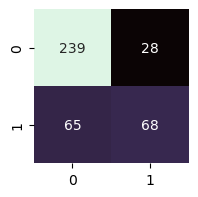

In [16]:
yhat_train = bagg_model.predict(X_train)
# Confusion Matrix
cm = confusion_matrix(y_train,yhat_train)
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, cbar=False, fmt='d',cmap='mako')
plt.show()

In [17]:
print(classification_report(y_train,yhat_train))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       267
           1       0.71      0.51      0.59       133

    accuracy                           0.77       400
   macro avg       0.75      0.70      0.72       400
weighted avg       0.76      0.77      0.76       400



#### Evaluate model on testing data

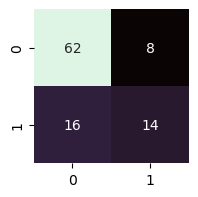

In [18]:
yhat_test = bagg_model.predict(X_test)
# Confusion Matrix
cm = confusion_matrix(y_test,yhat_test)
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, cbar=False, fmt='d',cmap='mako')
plt.show()

In [19]:
print(classification_report(y_test,yhat_test))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84        70
           1       0.64      0.47      0.54        30

    accuracy                           0.76       100
   macro avg       0.72      0.68      0.69       100
weighted avg       0.75      0.76      0.75       100



#### Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
# Build the model
rf_model = RandomForestClassifier(n_estimators=50, max_depth=4, max_features=3 )

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features=3, n_estimators=50)

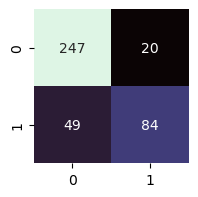

In [22]:
#### Evaluate model on training data
yhat_train = rf_model.predict(X_train)
# Confusion Matrix
cm = confusion_matrix(y_train,yhat_train)
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, cbar=False, fmt='d',cmap='mako')
plt.show()

In [23]:
print(classification_report(y_train,yhat_train))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       267
           1       0.81      0.63      0.71       133

    accuracy                           0.83       400
   macro avg       0.82      0.78      0.79       400
weighted avg       0.83      0.83      0.82       400



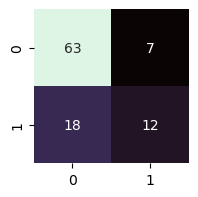

In [24]:
#### Evaluate model on testing data
yhat_test = rf_model.predict(X_test)
# Confusion Matrix
cm = confusion_matrix(y_test,yhat_test)
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, cbar=False, fmt='d',cmap='mako')
plt.show()

In [25]:
print(classification_report(y_test,yhat_test))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83        70
           1       0.63      0.40      0.49        30

    accuracy                           0.75       100
   macro avg       0.70      0.65      0.66       100
weighted avg       0.73      0.75      0.73       100

